In [47]:
import torch
import os
from torch.utils.data import TensorDataset,ConcatDataset,DataLoader
import matplotlib.pyplot as plt
path_to_pt_ekyn = f'../../sleep/pt_ekyn'
recording_filenames = os.listdir(path_to_pt_ekyn)
X,y = torch.load(f'{path_to_pt_ekyn}/{recording_filenames[0]}')
dataloader = DataLoader(TensorDataset(X,y),batch_size=512,shuffle=True)
Xi,yi = next(iter(dataloader))
print(Xi.shape,yi.shape)

torch.Size([512, 5000]) torch.Size([512, 3])


In [48]:
from torch import nn
from torch.nn.functional import relu
class MLPSleepStager(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.fc1 = nn.Linear(in_features=5000,out_features=64)
        self.fc2 = nn.Linear(in_features=64,out_features=3)
    def forward(self,x):
        x = self.fc1(x)
        x = relu(x)
        x = self.fc2(x)
        return x
model = MLPSleepStager()
optimizer = torch.optim.AdamW(model.parameters(),lr=3e-4)
criterion = nn.CrossEntropyLoss()

In [49]:
device = 'mps'
model.to(device)
lossi = []
from tqdm import tqdm
for epoch in tqdm(range(100)):
    for Xi,yi in dataloader:
        Xi,yi = Xi.to(device),yi.to(device)
        optimizer.zero_grad()
        logits = model(Xi)
        loss = criterion(logits,yi)
        loss.backward()
        optimizer.step()
        lossi.append(loss.item())

100%|██████████| 100/100 [00:09<00:00, 10.42it/s]


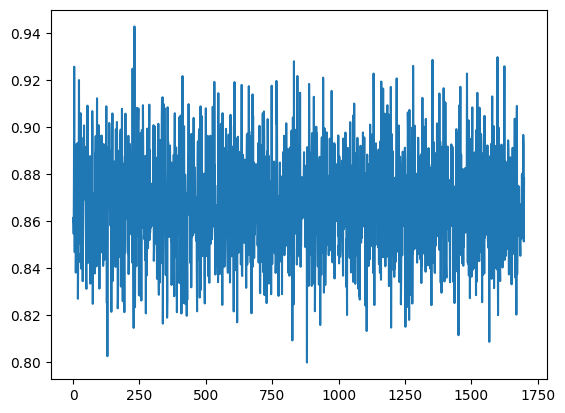

In [46]:
plt.plot(lossi)